
**Moja-Global/Outreachy December 2023 Contribution Phase **

#**Task 3- Geospatial Analysis**

Exploring the climate change and environmental degradation of Himalyan region**

I am focusing on Himalayan region in India. The region is also home to diverse ecosystems and numerous species of flora and fauna, many of which are endemic and thus of significant conservation value. The Himalayan region of India, often referred to as the "Water Tower of Asia," is particularly vulnerable to the impacts of climate change and environmental degradation.

Why is the Himalayan Region Vulnerable?

- The Himalayan region is experiencing a warming rate that is significantly higher than the global average, resulting in glacier retreat, reduced snow cover, and shifts in precipitation patterns.Glacial retreat leads to the formation of glacial lakes, which can potentially result in glacial lake outburst floods (GLOFs), posing a risk to downstream communities and infrastructure.

- Deforestation, illegal mining, and infrastructure development have led to habitat fragmentation and loss, threatening wildlife and reducing the region's ecological resilience. Overgrazing, unsustainable agricultural practices, and pollution have resulted in soil erosion, land degradation, and water quality issues.
<br>


**Sub-Task A: Geospatial analysis for anual mean temperature for himalayan region.**

**Sub-Task B: Geospatial analysis for annual mean precipitation for himalayan region.**

**Sub-Task C: Geospatial analysis to show the climate shift in Himalayan region.**

In [1]:
# install and import condalab, run twice.
!pip install -q condacolab -q

In [1]:
# Run it twice
import condacolab
condacolab.install()

✨🍰✨ Everything looks OK!


In [4]:
!pip install rasterio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 62.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.9/97.9 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 69.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.1/103.1 kB 10.0 MB/s eta 0:00:00


## **Initialize libraries**

In [5]:
# Import all necessary libraries
import numpy as np
import geopandas as gpd
import pandas as pd
import seaborn as sns
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import rasterio as rst
%matplotlib inline

# for download and decompress the dataset
import os, zipfile, glob, io, requests


In [6]:
# Mounting the google drive on google colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Functions defined and used**

In [7]:
def column_std(df):
    """
    Standardises column names
    """
    return df.columns.str.lower()

def clip_df(df_complete, df_n):
    """
    Clips the dataset to retain only the necessary data
    """
    return df_complete.clip(df_n)

def plot_boundary(df, ax, color='none', edgecolor='black'):
    """
    Plots the administrative boundaries
    """
    df.plot(ax=ax, color=color, edgecolor=edgecolor)

def plot_feature(df, ax, column, edgecolor='black', cmap='tab20'):
    """
    Plots the features
    """
    df.plot(ax=ax, column=column, edgecolor=edgecolor, cmap=cmap, legend=True)

# **Loading the neccessary data files**

In [8]:
# Loading the administraive boundaries of India
ind_df = (r"/content/drive/MyDrive/Outreachy_datasets/LandSectorDatasets/World_datasets/Administrative/Boundaries/Level2 by Country/IND/IND_AL2_India.json")


# Read geojson file into a geodataframe
ind_df = gpd.read_file(ind_df)
ind_df

,country,ISO3166_2,name,enname,locname,offname,boundary,adminlevel,wikidata,wikimedia,timestamp,geometry
0,IND,,India,India,India,,administrative,2,Q668,hi:भारत,2019-10-02 22:56:03,"MULTIPOLYGON (((93.78876 6.90034, 93.78876 6.9..."


In [17]:
# Loading the administraive boundaries of Indian states
ind_state_df = (r"/content/drive/MyDrive/Outreachy_datasets/LandSectorDatasets/World_datasets/Administrative/Boundaries/Level4 by State/IND/IND_ALL_states.json")
# Read geojson file into a geodataframe
ind_state_df = gpd.read_file(ind_state_df)

# Loading the administraive boundaries of  Himachal Pradesh state
hima_state_df = (r"/content/drive/MyDrive/Outreachy_datasets/LandSectorDatasets/World_datasets/Administrative/Boundaries/Level4 by State/IND/IND_AL4_Himachal Pradesh.json")
# Read geojson file into a geodataframe
hima_state_df = gpd.read_file(hima_state_df)

# Loading the administraive boundaries of  Arunachal Pradesh state
aruna_state_df = (r"/content/drive/MyDrive/Outreachy_datasets/LandSectorDatasets/World_datasets/Administrative/Boundaries/Level4 by State/IND/IND_AL4_Arunachal Pradesh.json")
# Read geojson file into a geodataframe
aruna_state_df = gpd.read_file(aruna_state_df)

# Loading the administraive boundaries of  Arunachal Pradesh state
JK_df = (r"/content/drive/MyDrive/Outreachy_datasets/LandSectorDatasets/World_datasets/Administrative/Boundaries/Level4 by State/IND/IND_AL4_Jammu and Kashmir.json")
# Read geojson file into a geodataframe
JK_df = gpd.read_file(JK_df)

# Loading the administraive boundaries of  Uttarakhand state
uttra_df = (r"/content/drive/MyDrive/Outreachy_datasets/LandSectorDatasets/World_datasets/Administrative/Boundaries/Level4 by State/IND/IND_AL4_Uttarakhand.json")
# Read geojson file into a geodataframe
uttra_df = gpd.read_file(uttra_df)

# Loading the administraive boundaries of Assam state
assam_df = (r"/content/drive/MyDrive/Outreachy_datasets/LandSectorDatasets/World_datasets/Administrative/Boundaries/Level4 by State/IND/IND_AL4_Assam.json")
# Read geojson file into a geodataframe
assam_df = gpd.read_file(assam_df)

# Loading the administraive boundaries of Uttar Pradesh state
UP_df = (r"/content/drive/MyDrive/Outreachy_datasets/LandSectorDatasets/World_datasets/Administrative/Boundaries/Level4 by State/IND/IND_AL4_Uttar Pradesh.json")
# Read geojson file into a geodataframe
UP_df = gpd.read_file(UP_df)

# Loading the administraive boundaries of Bihar state
bihar_df = (r"/content/drive/MyDrive/Outreachy_datasets/LandSectorDatasets/World_datasets/Administrative/Boundaries/Level4 by State/IND/IND_AL4_Bihar.json")
# Read geojson file into a geodataframe
bihar_df = gpd.read_file(bihar_df)

# Loading the administraive boundaries of West Bengal state
west_beng_df = (r"/content/drive/MyDrive/Outreachy_datasets/LandSectorDatasets/World_datasets/Administrative/Boundaries/Level4 by State/IND/IND_AL4_West Bengal.json")
# Read geojson file into a geodatafram
west_beng_df = gpd.read_file(west_beng_df)


In [18]:
# Creating a single df for all the himalayan states
state_dfs = [hima_state_df, aruna_state_df, JK_df,uttra_df,assam_df,UP_df, bihar_df, west_beng_df]
# Joined the df
all_states_df = pd.concat(state_dfs)

#A. Geospatial analysis for the Annual mean temperature


In [19]:
from rasterio.mask import mask
import matplotlib.cm as cm
import matplotlib.colors as colors
import numpy as np


In [20]:
#reading the downloaded tif file (mentioned in references)
avg_temp_tif = r'/content/drive/MyDrive/Outreachy_datasets/wc2.1_10m_bio/wc2.1_10m_bio_1.tif'
temp_tif = rst.open(avg_temp_tif)

In [21]:
# clipping ind from tif
ind_temp, ind_transform = mask(temp_tif, [geom for geom in ind_df.geometry], crop=True, pad=True)
ind_meta = temp_tif.meta

# saving the clipped raster
ind_meta.update({"driver": "GTiff",
                 "height": ind_temp.shape[1],
                 "width": ind_temp.shape[2],
                 "transform": ind_transform})

with rst.open(r'temp_clipped.tiff', 'w', **ind_meta) as dest:
    dest.write(ind_temp)

In [22]:
# reading the clipped and saved ind raster
ind_temp_tif = r'temp_clipped.tiff'
ind_temp_img = rst.open(ind_temp_tif)
arr = ind_temp_img.read(1)
arr = np.where(arr < -30, np.nan, arr)

In [24]:
import matplotlib.pyplot as plt
from rasterio.plot import show

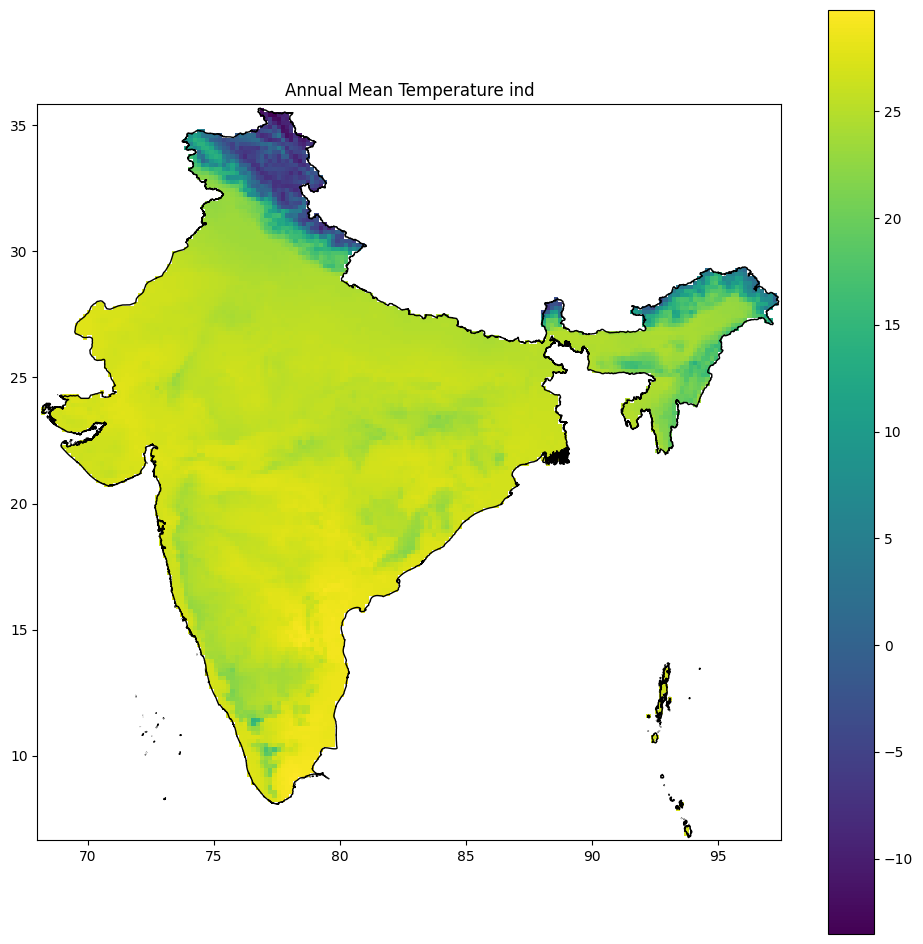

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12));
ind_df.plot(ax=ax, color='none', legend=True)
show(arr, transform=ind_temp_img.transform, ax=ax)
ax.set_title("Annual Mean Temperature ind")
fig.colorbar(cm.ScalarMappable(norm=colors.Normalize(vmin=np.nanmin(arr), vmax=np.nanmax(arr))), ax=ax)
plt.show()

In [50]:
# clipping Himalayan state from tif
hima_temp, hima_transform = mask(temp_tif, [geom for geom in all_states_df.geometry], crop=True, pad=True)
hima_meta = temp_tif.meta

# saving the clipped raster
hima_meta.update({"driver": "GTiff",
                 "height": hima_temp.shape[1],
                 "width": hima_temp.shape[2],
                 "transform": hima_transform})

with rst.open(r'temp_clipped.tiff', 'w', **hima_meta) as dest:
    dest.write(hima_temp)

In [51]:
# reading the clipped and saved hima raster
hima_temp_tif = r'temp_clipped.tiff'
hima_temp_img = rst.open(hima_temp_tif)
arr = hima_temp_img.read(1)
arr = np.where(arr < -10, np.nan, arr)

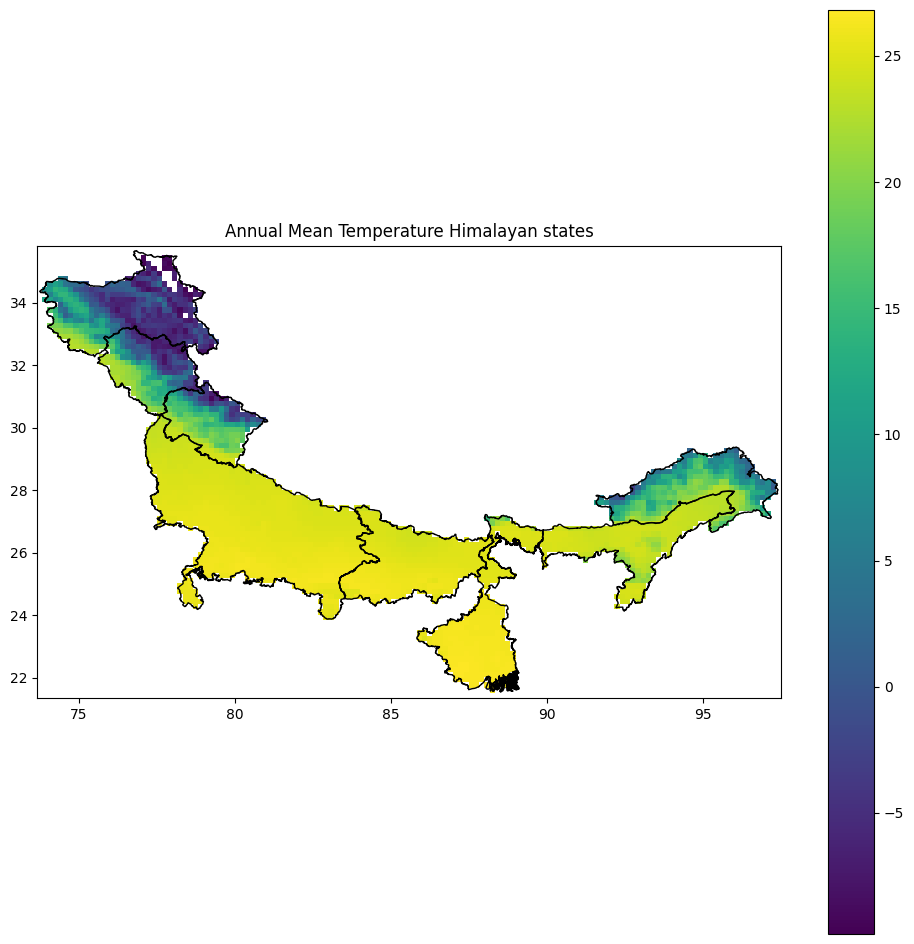

In [53]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12));
all_states_df.plot(ax=ax, color='none', legend=True)
show(arr, transform=hima_temp_img.transform, ax=ax)
ax.set_title("Annual Mean Temperature Himalayan states")
fig.colorbar(cm.ScalarMappable(norm=colors.Normalize(vmin=np.nanmin(arr), vmax=np.nanmax(arr))), ax=ax)
plt.show()

#Findings:

- In the Himalayan states, the annual mean temperature varies significantly due to the diverse topography and altitudinal range.

- The lower foothills and valleys tend to experience higher temperatures compared to the higher altitudes where it is considerably cooler.

- The high mountainous regions, with their steep terrains and peaks such as the mighty Everest, fall into the Polar Rain Tundra zone according to Holdridge & Agro-Ecological data, and have the lowest mean temperatures, often falling below 6°C or 42°F.

- On the other hand, regions such as Himachal Pradesh and Uttarakhand, with their warm temperate moist forests and tropical montane climate, exhibit higher mean temperatures, ranging from 10-16°C.

- These diverse climate zones contribute significantly to the rich biodiversity and unique agricultural practices prevalent in the Himalayan states.

#B. Geospatial analysis for Annual Mean Precipitation



In [68]:
#reading the downloaded tif file (mentioned in references)
avg_ppt_tif = r'/content/drive/MyDrive/Outreachy_datasets/wc2.1_10m_bio/wc2.1_10m_bio_12.tif'
ppt_tif = rst.open(avg_ppt_tif)

In [69]:
# clipping ind from tif
ind_ppt, ind_transform = mask(ppt_tif, [geom for geom in ind_df.geometry], crop=True, pad=True)
ind_meta = ppt_tif.meta

# saving the clipped raster
ind_meta.update({"driver": "GTiff",
                 "height": ind_ppt.shape[1],
                 "width": ind_ppt.shape[2],
                 "transform": ind_transform})

with rst.open(r'ppt_clipped.tiff', 'w', **ind_meta) as dest:
    dest.write(ind_ppt)

In [70]:
# reading the clipped and saved ind raster
ind_ppt_tif = r'ppt_clipped.tiff'
ind_ppt_img = rst.open(ind_ppt_tif)
arr = ind_ppt_img.read(1)
arr = np.where(arr < 0, np.nan, arr)

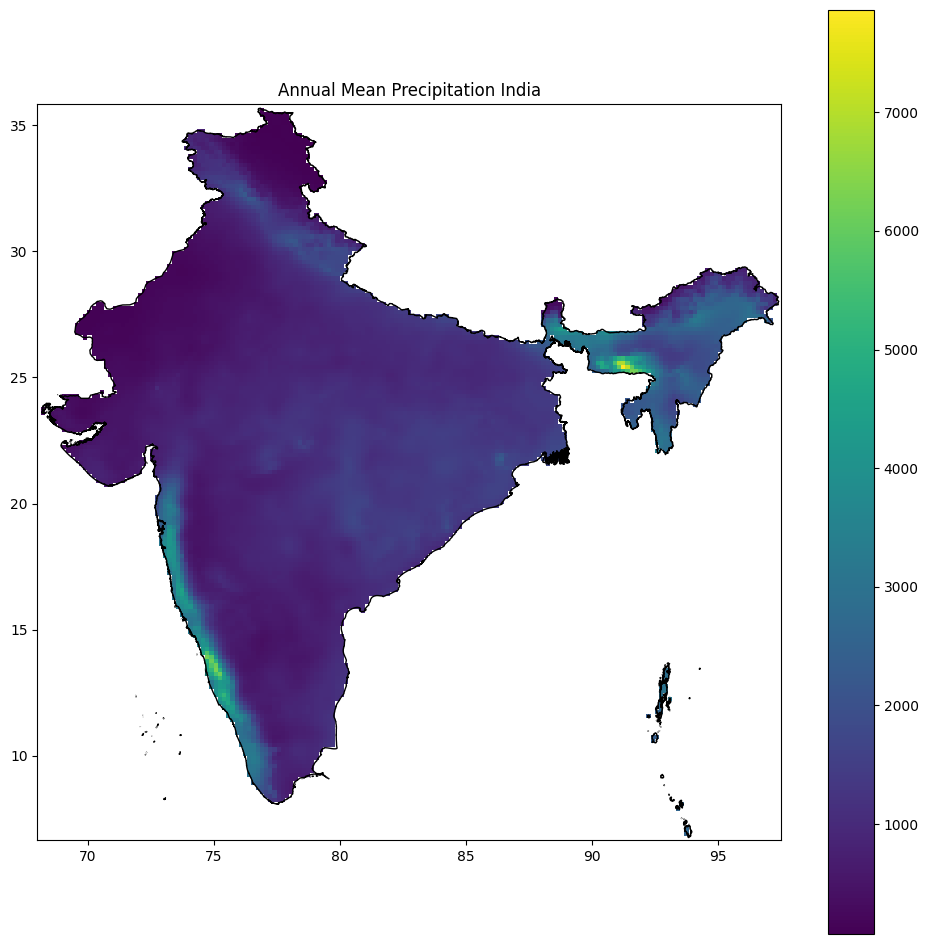

In [71]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12));
ind_df.plot(ax=ax, color='none', legend=True)
show(arr, transform=ind_ppt_img.transform, ax=ax)
ax.set_title("Annual Mean Precipitation India")
fig.colorbar(cm.ScalarMappable(norm=colors.Normalize(vmin=np.nanmin(arr), vmax=np.nanmax(arr))), ax=ax)
plt.show()

In [76]:
# clipping Himalayan state from tif
hima_ppt, hima_transform = mask(ppt_tif, [geom for geom in all_states_df.geometry], crop=True, pad=True)
hima_meta = temp_tif.meta

# saving the clipped raster
hima_meta.update({"driver": "GTiff",
                 "height": hima_temp.shape[1],
                 "width": hima_temp.shape[2],
                 "transform": hima_transform})

with rst.open(r'ppt_clipped.tiff', 'w', **hima_meta) as dest:
    dest.write(hima_ppt)

In [77]:
# reading the clipped and saved ind raster
hima_ppt_tif = r'ppt_clipped.tiff'
hima_ppt_img = rst.open(hima_ppt_tif)
arr = hima_ppt_img.read(1)
arr = np.where(arr < -5, np.nan, arr)

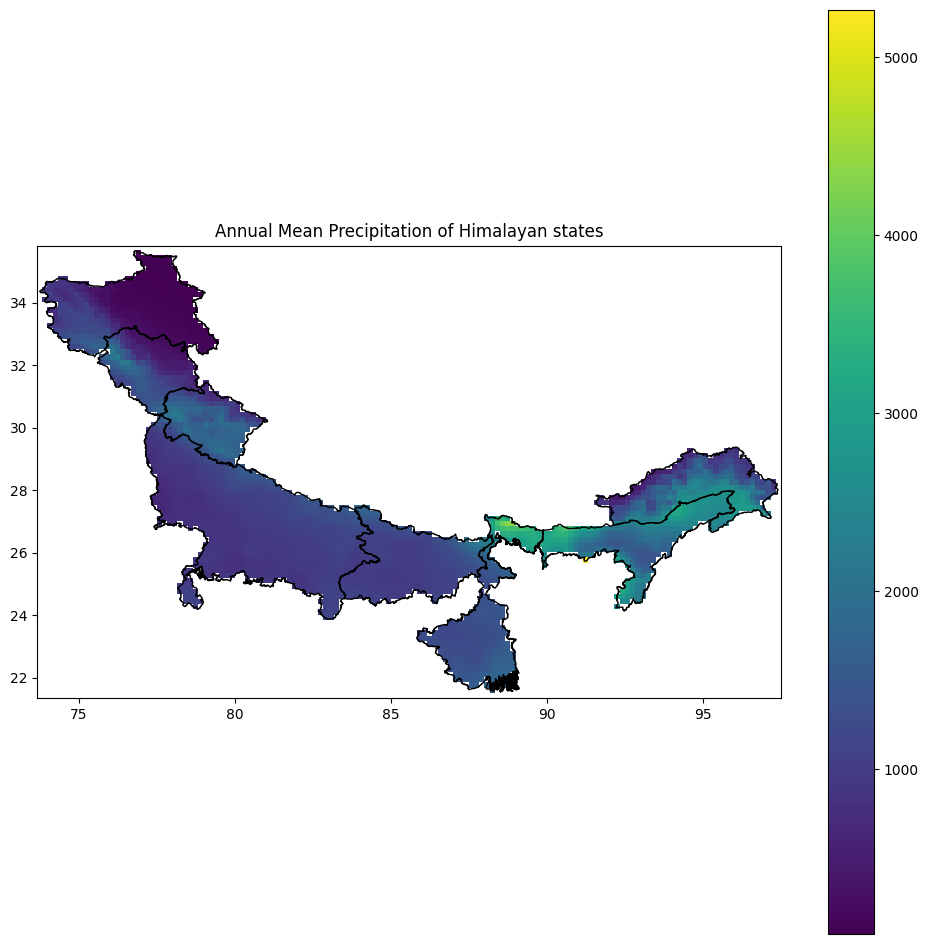

In [78]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12));
all_states_df.plot(ax=ax, color='none', legend=True)
show(arr, transform=hima_ppt_img.transform, ax=ax)
ax.set_title("Annual Mean Precipitation of Himalayan states")
fig.colorbar(cm.ScalarMappable(norm=colors.Normalize(vmin=np.nanmin(arr), vmax=np.nanmax(arr))), ax=ax)
plt.show()

#Findings:

The Himalayan states experience a varied range of precipitation patterns owing to the complex topography. The foothill regions and lower valleys generally receive moderate rainfall throughout the year. The annual mean precipitation in the high mountainous regions, which include the great Himalayan range, is significantly higher due to the presence of Polar Rain Tundra zones, similar to the Southern Alps in the South Island. Conversely, the eastern regions, which are shadowed by the massive mountain ranges, tend to receive the least amount of rainfall, resulting in distinct dry zones. These variations in precipitation significantly influence the region's ecology, agriculture, and overall climate.

# **C. Koppen-Geiger Climate Changes (1901 - 2000)**

- The Köppen-Geiger climate classification system is widely used to categorize global climates based on temperature and precipitation patterns. This section provides a comprehensive analysis of the changes in Köppen-Geiger climate classifications in the Himalayan states over the 20th century, from 1901 to 2000.

- The analysis was conducted using historical climate data obtained from the Moja global LandScetor Dataset repository.

In [ ]:
# Koppen-Geiger Climate Changes (1901 - 2100)
# Load the data and prepare the datasets
# not working file not found# !wget 'https://datasets.mojaglobal.workers.dev/0:/Climate/KoppenGeiger_ClimateShifts1901_2100/KoppenGeigerClimateShifts.zip'
with zipfile.ZipFile('/content/drive/MyDrive/Outreachy_datasets/LandSectorDatasets/World_datasets/Climate/KoppenGeigerClimateShifts.zip', 'r') as shifts:
  shifts.extractall("shifts")

# remove zip
#%rm KoppenGeigerClimateShifts.zip

# path to the folder
files = glob.glob(os.path.join('/content/shifts', '*geojson'))
#print(files)

In [ ]:
# Rename and arrange the information
# prepare names
names = [i[16:25]+ '_' + i[26:28] for i in files]

# prepare the files
files_loaded = [gpd.read_file(f) for f in files]

# merging all the metadata
koppen = list(zip(names, files_loaded))

# print the results
print('%2d dataset were imported for shift in climate Zones.' %(len(koppen)))



20 dataset were imported for shift in climate Zones.


In [ ]:
# fixing the data, adding abbreviations and koppen-geiger terms

# the Koppen-Geiger system
koppen_abb = {'11': 'Af', '12': 'Am', '13': 'As', '14': 'Aw', '21': 'BWk',
              '22': 'BWh', '26': 'BSk', '27': 'BSh', '31': 'Cfa',
              '32': 'Cfb', '33': 'Cfc', '34': 'Csa', '35': 'Csb',
              '36': 'Csc', '37': 'Cwa', '38': 'Cwb', '39': 'Cwc',
              '41': 'Dfa', '42': 'Dfb', '43': 'Dfc', '44': 'Dfd',
              '45': 'Dsa', '46': 'Dsb', '47': 'Dsc', '48': 'Dsd',
              '49': 'Dwa', '50': 'Dwb', '51': 'Dwc', '52': 'Dwd',
              '61': 'EF', '62': 'ET', '0': 'NaN'}

koppen_term ={'Af' : 'Tropical rainforest climate', 'Am' : 'Tropical monsoon climate',
              'As' : 'Tropical savanna climate with dry-summer characteristics',
              'Aw' : 'Tropical savanna climate with dry-winter characteristics',
              'BWk' : 'Cold desert climate', 'BWh' : 'Hot desert climate',
              'BSk' : 'Cold semi-arid climate', 'BSh' : 'Hot semi-arid climate',
              'Cfa' : 'Humid subtropical climate;', 'Cfb' : 'Temperate oceanic climate',
              'Cfc' : 'Subpolar oceanic climate', 'Csa' : 'Hot-summer Mediterranean climate',
              'Csb' : 'Warm-summer Mediterranean climate', 'Csc' : 'Cold-summer Mediterranean climate',
              'Cwa' : 'Monsoon-influenced humid subtropical climate', 'Cwb' : 'Subtropical highland climate',
              'Cwc' : 'Cold subtropical highland climate', 'Dfa' : 'Hot-summer humid continental climate',
              'Dfb' : 'Warm-summer humid continental climate', 'Dfc' : 'Subarctic climate',
              'Dfd' : 'Extremely cold subarctic climate', 'Dsa' : 'Mediterranean-influenced hot-summer humid continental climate',
              'Dsb' : 'Mediterranean-influenced warm-summer humid continental climate',
              'Dsc' : 'Mediterranean-influenced subarctic climate', 'Dsd' : 'Mediterranean-influenced extremely cold subarctic climate',
              'Dwa' : 'Monsoon-influenced hot-summer humid continental climate', 'Dwb' : 'Monsoon-influenced warm-summer humid continental climate',
              'Dwc' : 'Monsoon-influenced subarctic climate', 'Dwd' : 'Monsoon-influenced extremely cold subarctic climate',
              'EF' : 'Ice cap climate', 'ET' : 'Tundra climate'}

# replacing in all the dataframes
for i in koppen:
  name, df = i
  # fixing df, lower columns
  df.columns = df.columns.str.lower()
  # mapping abbreviations
  df['gridcode'] = df['gridcode'].fillna(0) # handle empty
  df['gridcode'] = df['gridcode'].astype(int) # coercing for replace
  df['abb'] = df.gridcode.astype(str).replace(koppen_abb)
  # mappin name
  df['koppen'] = df.abb.replace(koppen_term)
  # selecting columns
  df = df[['abb', 'koppen', 'geometry', 'shape_length', 'shape_area']]



In [ ]:
# Plotting function - for horizontal
def plot_shift(df_list):
  font = {'family': 'serif',
          'color':  'darkred',
          'weight': 'normal',
          'size': 30,
          }

  fig, axs = plt.subplots(2,2, figsize=(30, 15), facecolor='w', edgecolor='k')

  for ax, i in zip(axs.ravel(),df_list) :
    name, df = i
    #name correction
    if '_' in name:
      name = name.replace('_', ' in ')

    df.set_crs(epsg=4326, inplace=True)
    df.plot(ax = ax, column='abb', cmap='tab20c',
            legend=True, legend_kwds= {'ncol': 3, 'loc': 'lower left'})
    ax.set_title(str(name), fontdict=font)
  plt.tight_layout()
  plt.show()
# Plotting function - for south america - peru
def plot_shiftv(df_list, legend_loc):
  font = {'family': 'serif',
          'color':  'darkred',
          'weight': 'normal',
          'size': 30,
          }

  fig, axs = plt.subplots(1,4, figsize=(30, 15), facecolor='w', edgecolor='k')

  for ax, i in zip(axs.ravel(),df_list) :
    name, df = i
    #name correction
    if '_' in name:
      name = name.replace('_', ' in ')

    df.set_crs(epsg=4326, inplace=True)
    df.plot(ax = ax, column='koppen', cmap='tab20c',
            legend=True, legend_kwds= {'ncol': 1, 'loc': legend_loc})
    ax.set_title(str(name), fontdict=font)
  plt.tight_layout()
  plt.show()
# Plotting function - for regions
def plot_shift_region(df_list,legend_loc):
  font = {'family': 'serif',
          'color':  'darkred',
          'weight': 'normal',
          'size': 30,
          }

  fig, axs = plt.subplots(2,2, figsize=(15, 15), facecolor='w', edgecolor='k')

  for ax, i in zip(axs.ravel(),df_list) :
    name, df = i
    #name correction
    if '_' in name:
      name = name.replace('_', ' in ')

    df.set_crs(epsg=4326, inplace=True)
    df.plot(ax = ax, column='koppen', cmap='tab20c',
            legend=True, legend_kwds= {'loc': legend_loc})
    ax.set_title(str(name), fontdict=font)
  plt.tight_layout()
  plt.show()

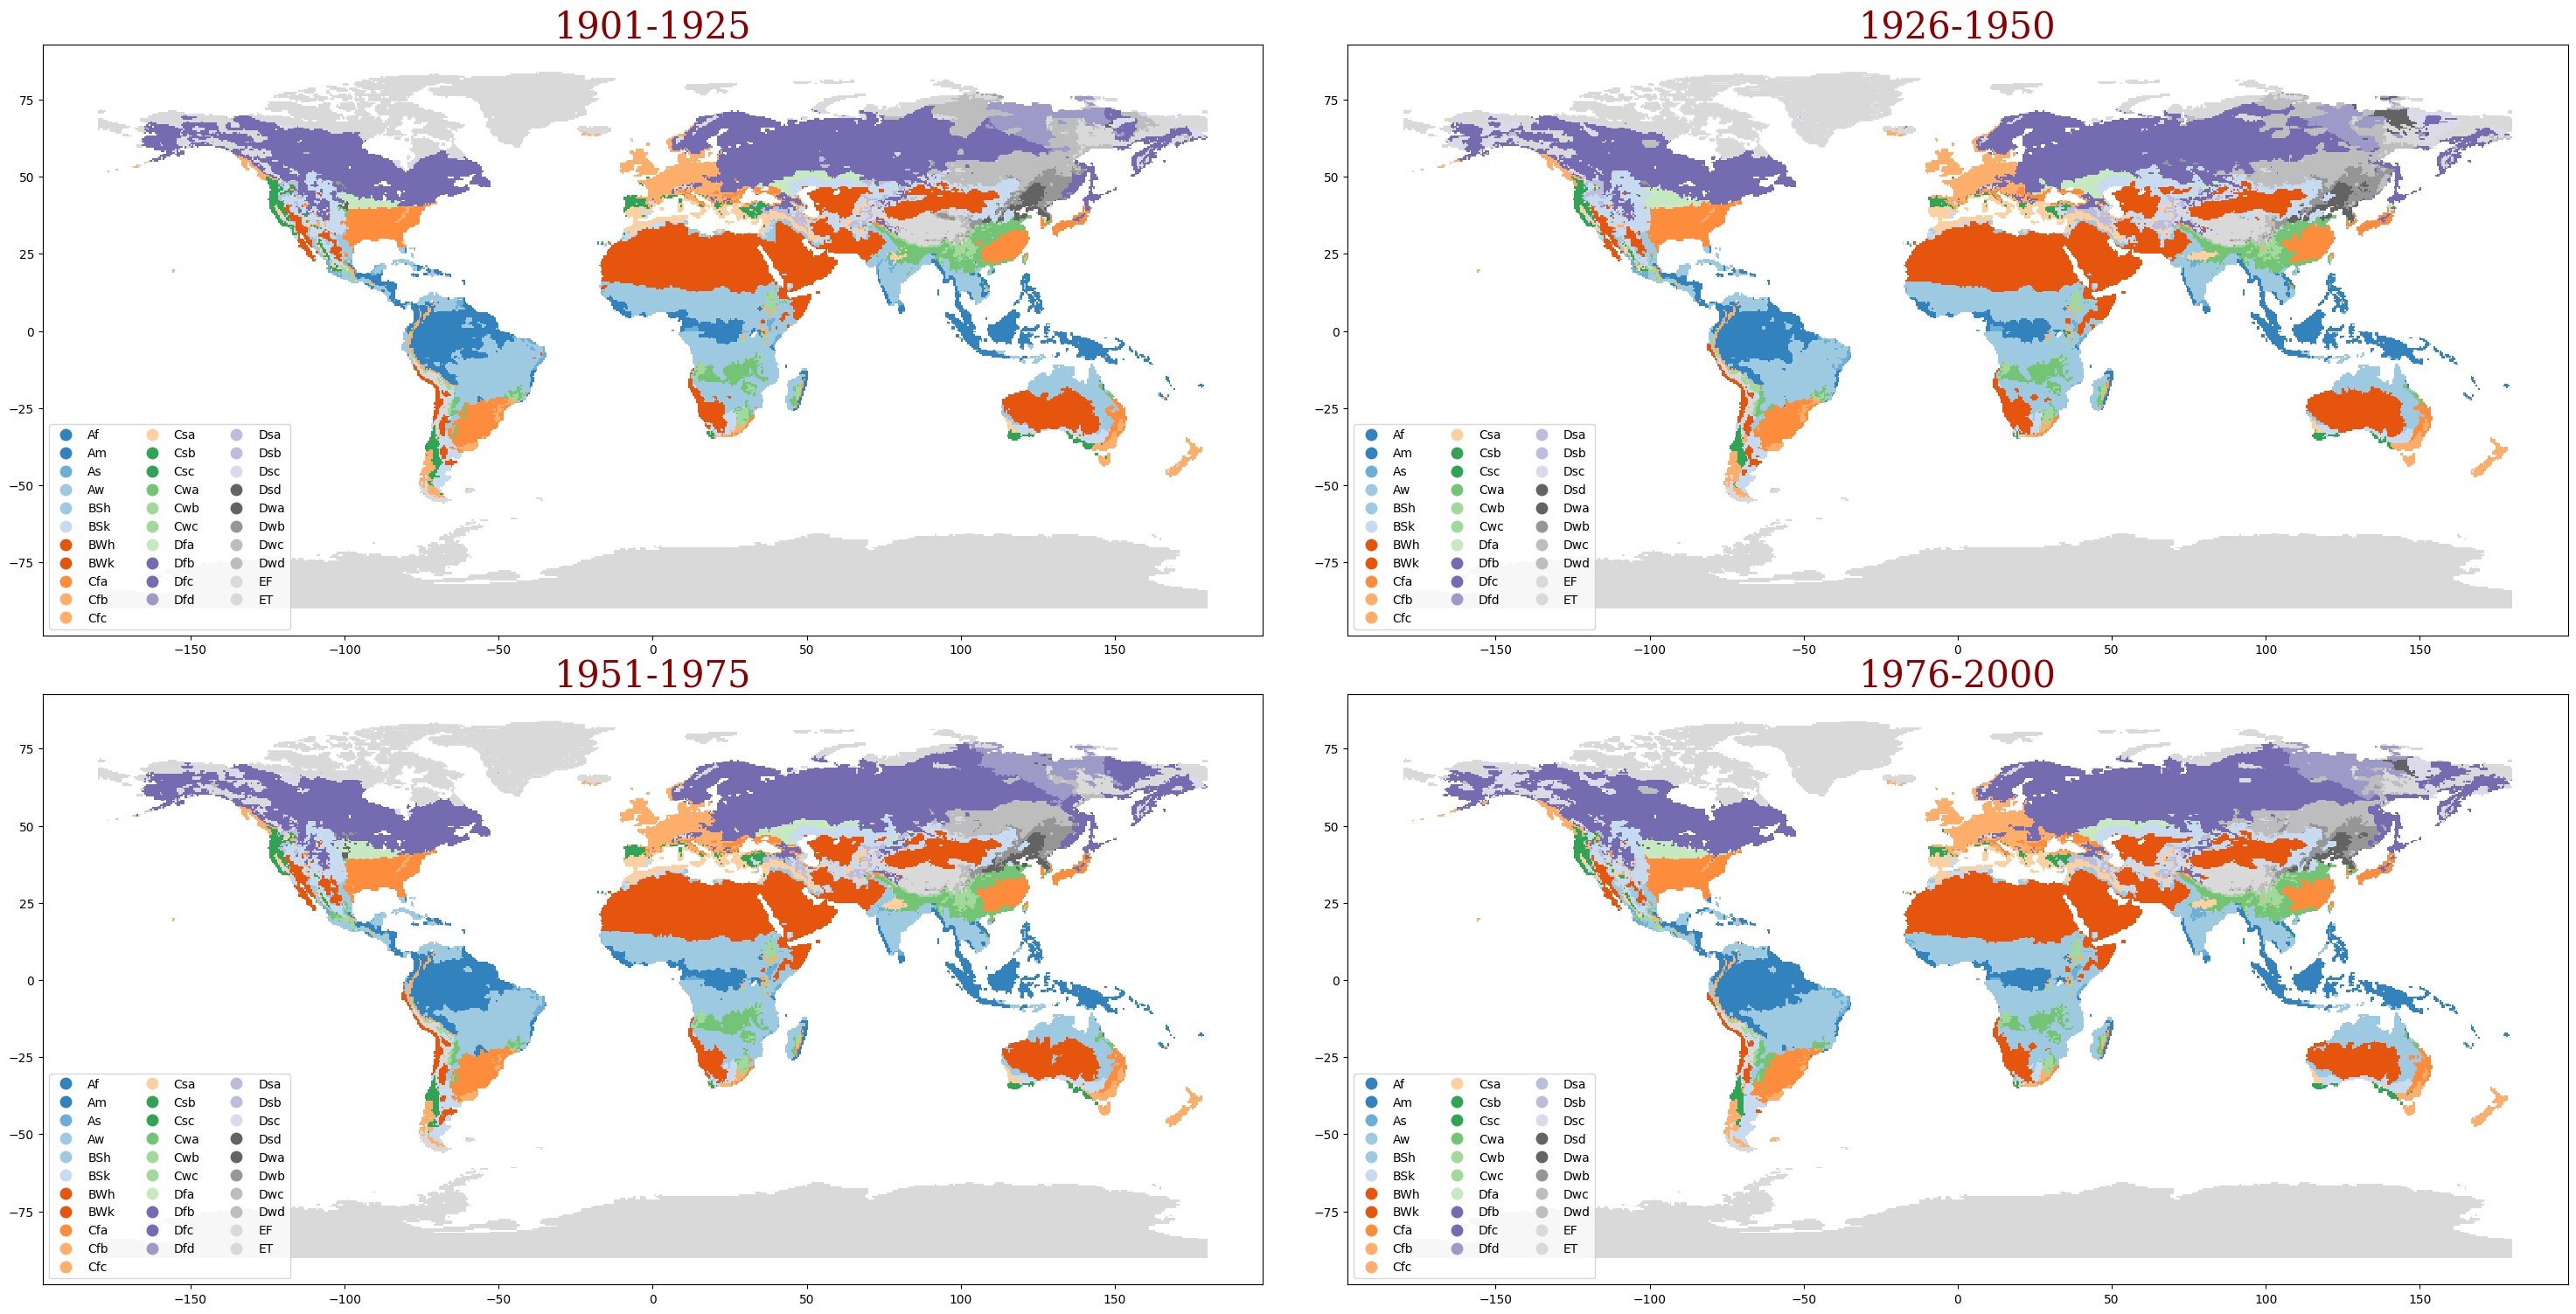

In [ ]:
# creating a new list for observations geojson (no other code than years)
observations_world = []
for i in koppen:
  name, df = i
  if name[-2:] == 'ge':
    observations_world.append((name[:-3], df))

# sorting the list by year
observations_world = sorted(observations_world, key = lambda x: int(x[0][0:3]))

# plotting variations in observations
plot_shift(observations_world)

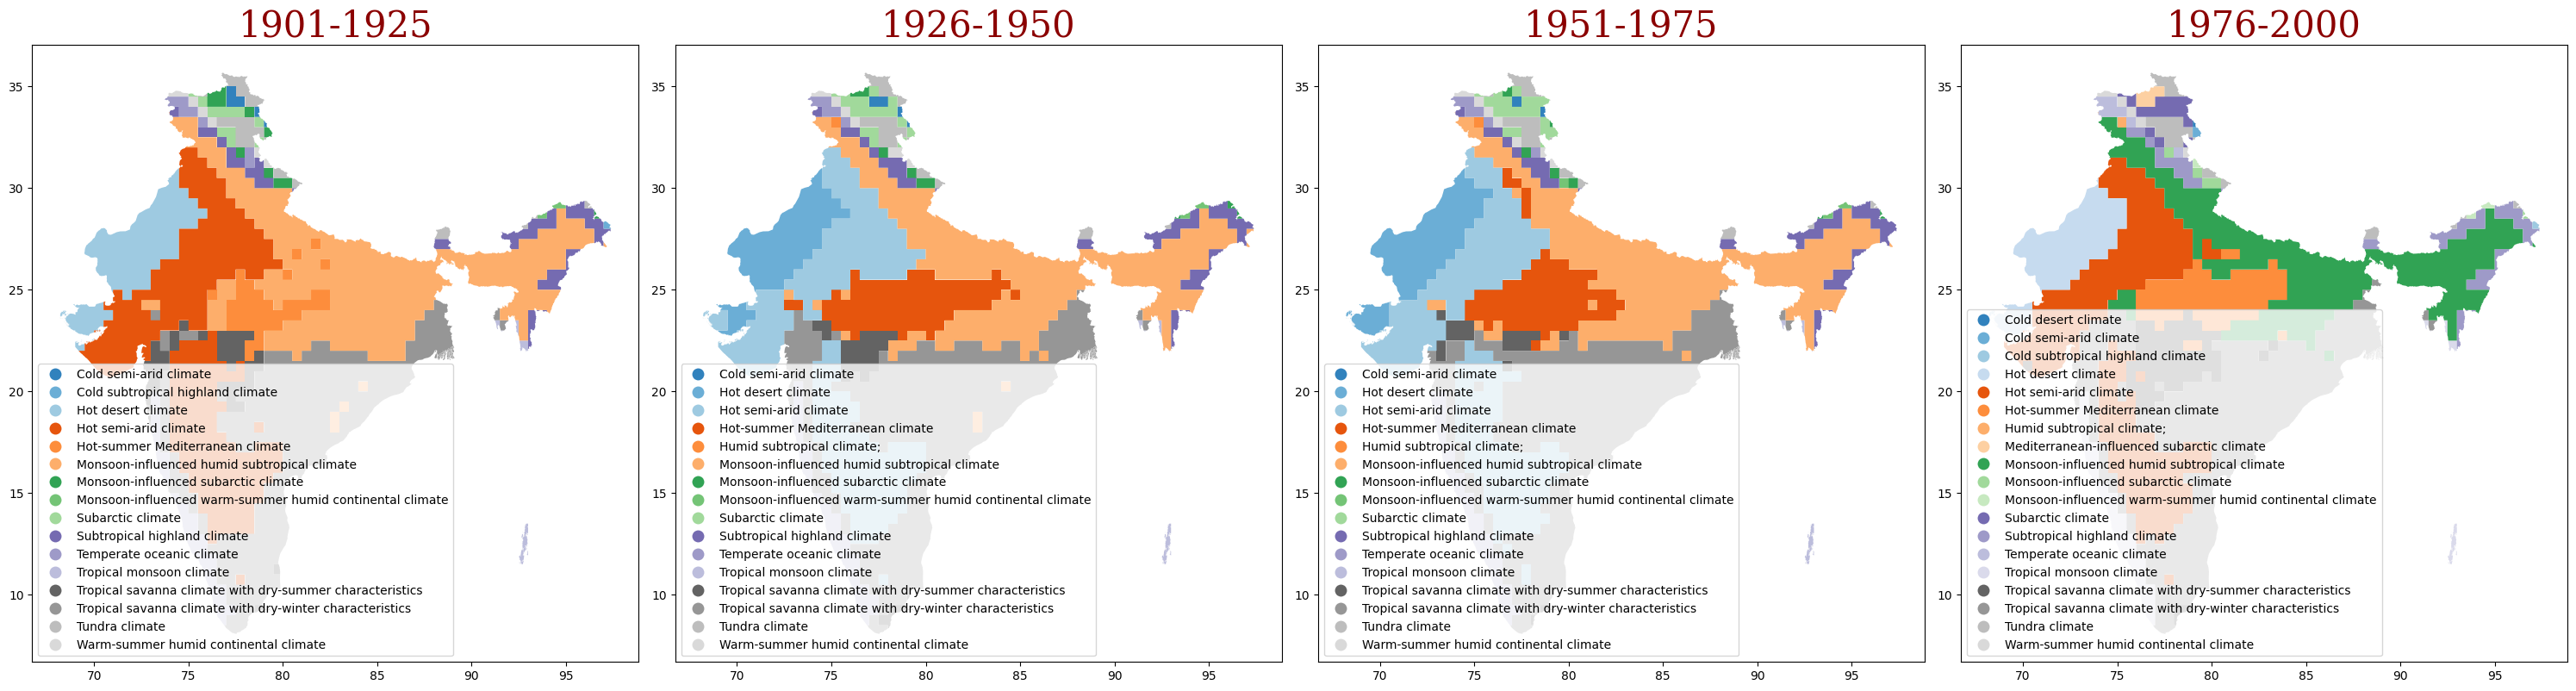

In [ ]:
# creating a new list for observations geojson for India
observations_ind = []
for i in observations_world:
  name, df = i
  temp = df.clip(ind_df)
  temp = temp.reset_index(drop=True)
  observations_ind.append((name, temp))

# plotting variations in observations
plot_shiftv(observations_ind, 'lower left')

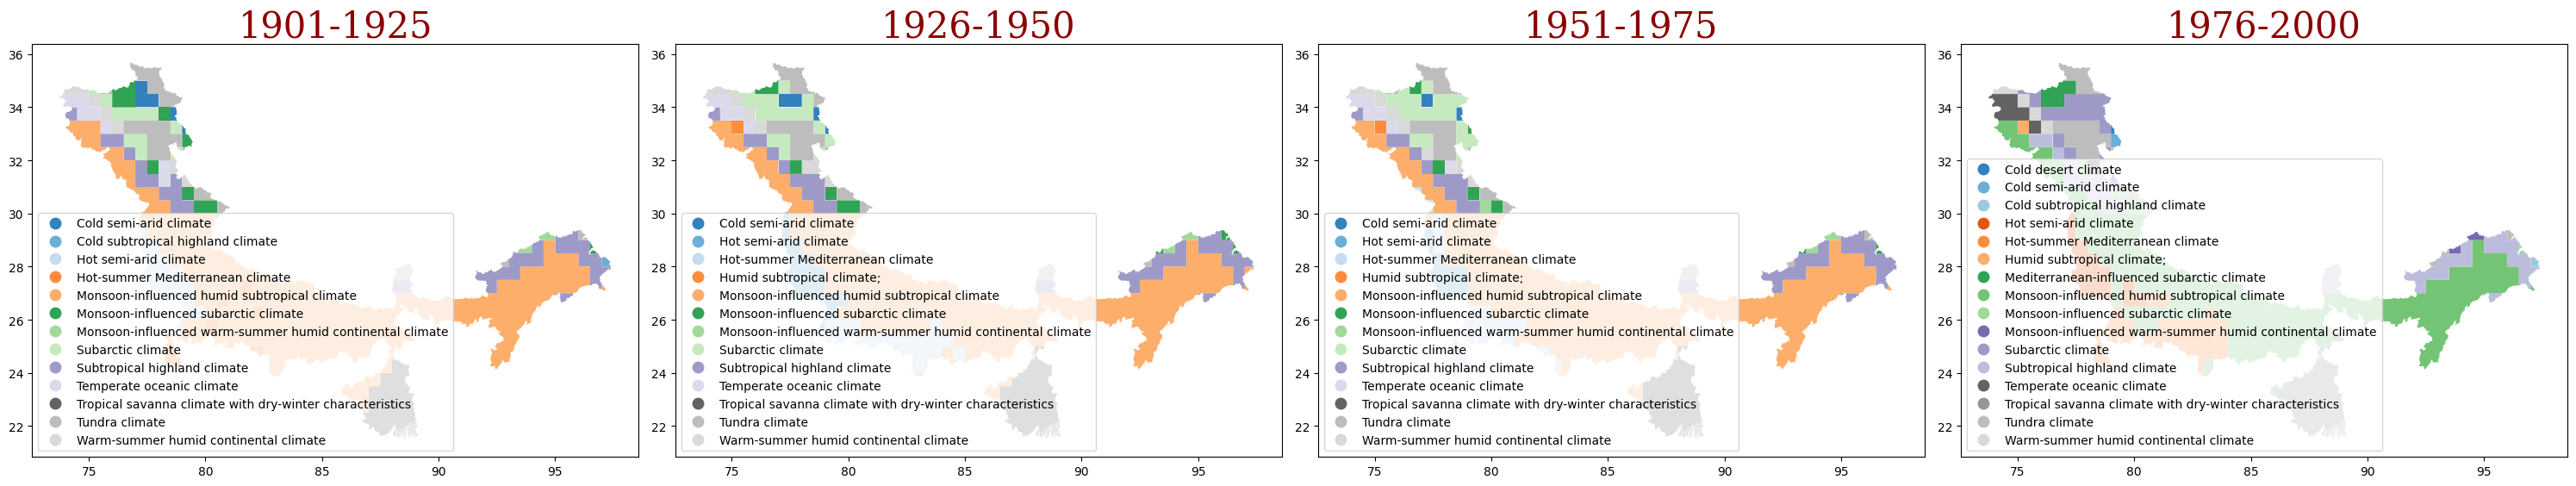

In [ ]:
# creating a new list for observations geojson for India
observations_ind = []
for i in observations_world:
  name, df = i
  temp = df.clip(all_states_df)
  temp = temp.reset_index(drop=True)
  observations_ind.append((name, temp))

# plotting variations in observations
plot_shiftv(observations_ind, 'lower left')



#Findings:

- There is a gradual shift from colder climate classifications (such as tundra and subarctic climates) to warmer classifications (such as temperate and subtropical climates) was observed in several regions.

- The areas of "monsoon-influenced humid subtropical climate" have been reduced to more than half by the end of 21st centuary.

- There is a considerable increase is the areas of "mosnsoon-influenced warm-summer humid continental climate" especially in Uttrakhand, Uttar Pradesh, Bihar and some of the north eastern part of India.

- Arid and semi-arid climates, indicating a trend towards drier conditions in certain parts of the Himalayan states.

The analysis of Köppen-Geiger climate classifications in the Himalayan states from 1901 to 2000 reveals significant changes in both temperature and precipitation patterns. These changes can have profound implications for the region's biodiversity, water resources, and human populations. Further research is needed to understand the underlying causes of these changes and to develop strategies for adapting to the evolving climate in the Himalayan states.

<br>

#**Conclusion:**

The geospatial analysis of the annual mean temperature and annual mean precipitation in the Himalayan states has provided valuable insights into the diverse climate zones and their implications on the region's ecology, agriculture, and overall climate.

The significant variation in the annual mean temperature across different altitudes and topographies has a direct impact on the biodiversity and agricultural practices prevalent in the Himalayan states. The higher altitudes, with their cooler temperatures, support unique ecosystems and contribute to the region's rich biodiversity. In contrast, the lower altitudes and valleys, with their higher temperatures, support different types of flora and fauna and have distinct agricultural practices.

The variation in annual mean precipitation also plays a crucial role in shaping the region's ecology and agriculture. The high mountainous regions receive significant rainfall, contributing to the region's water resources and supporting diverse ecosystems. Conversely, the dry zones in the eastern regions have a different set of challenges and opportunities.

These findings are essential in supporting the achievement of several Sustainable Development Goals (SDGs) in the Himalayan states. The SDGs that are directly supported by this analysis include:

SDG 2 (Zero Hunger): By understanding the diverse agricultural practices and their dependence on climate conditions, strategies can be developed to support sustainable agriculture and food security.

SDG 6 (Clean Water and Sanitation): The analysis can guide water management practices by indicating regions that may experience water scarcity or flooding due to ecological and climatic variations, enabling the implementation of appropriate water conservation or infrastructure measures.

SDG 13 (Climate Action): The insights gained from the analysis can inform strategies for climate action by identifying regions that are most vulnerable to climate change based on their ecological characteristics and require targeted mitigation and adaptation measures.

SDG 15 (Life on Land): The analysis can help identify key biodiversity areas and their specific ecological conditions, facilitating targeted conservation efforts. Additionally, it can guide sustainable land use practices to prevent land degradation and restore degraded ecosystems.

In conclusion, the geospatial analysis of the annual mean temperature and annual mean precipitation in the Himalayan states is a valuable tool for supporting the achievement of the Sustainable Development Goals in the region. The insights gained from the analysis will help guide policy decisions and strategies to address the challenges and opportunities posed by the region's diverse climate zones.